In [1]:
# !pip install plotly

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the original csv file, make a copy and make explorations
df_original = pd.read_csv("data/amazon_delivery.csv")
df = df_original.copy()
# df_original.head()
# df_original.describe
# df_original.info()

In [4]:
# Convert blank strings (" ") or empty strings ("") to NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Proceed to fill NaNs in numeric columns (less than 10%)
for col in df.select_dtypes(include='number').columns:
    null_ratio = df[col].isnull().mean()
    if null_ratio < 0.10:
        df[col] = df[col].fillna(df[col].mean())


In [5]:
# # check nulls
# for col in df.columns:
#     print(col, " has ", df.isnull().sum(), "nulls.")

In [6]:
df["Weather"].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', nan],
      dtype=object)

#### In weather with blank, filled with unknown

In [7]:
# df['Weather'].fillna('Unknown', inplace=True)

df['Weather'] = df['Weather'].fillna('Unknown')
df["Weather"]


0             Sunny
1            Stormy
2        Sandstorms
3             Sunny
4            Cloudy
            ...    
43734         Windy
43735         Windy
43736        Cloudy
43737        Cloudy
43738           Fog
Name: Weather, Length: 43739, dtype: object

In [8]:
# Convert blank strings (" ") or empty strings ("") to NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Proceed to fill NaNs in numeric columns (less than 10%)
for col in df.select_dtypes(include='number').columns:
    null_ratio = df[col].isnull().mean()
    if null_ratio < 0.10:
        df[col] = df[col].fillna(df[col].mean())

In [9]:
# # check nulls
# for col in df:
#     print(col, " has ", df.isnull().sum(), "nulls.")

In [10]:
# Check unique values in categorical columns (inconsistencies, typos, case issues)
for col in df.select_dtypes(include='object').columns:
    print(f"{col}:")
    print(df[col].value_counts(dropna=False))
    print("-" * 40)

Order_ID:
Order_ID
ialx566343618    1
akqg208421122    1
njpu434582536    1
rjto796129700    1
zguw716275638    1
                ..
jlxf819993117    1
aevx342135787    1
xnek760674819    1
cynl434665991    1
nsyz997960170    1
Name: count, Length: 43739, dtype: int64
----------------------------------------
Order_Date:
Order_Date
2022-03-15    1141
2022-04-03    1133
2022-03-13    1123
2022-03-26    1119
2022-03-03    1119
2022-03-09    1117
2022-03-05    1112
2022-03-24    1112
2022-03-21    1107
2022-04-05    1106
2022-03-19    1103
2022-03-11    1094
2022-03-07    1093
2022-04-01    1092
2022-03-28    1092
2022-03-30    1091
2022-03-17    1085
2022-03-01    1076
2022-03-02     969
2022-03-16     955
2022-03-06     949
2022-03-10     947
2022-03-20     945
2022-04-02     945
2022-03-04     944
2022-02-11     940
2022-03-29     938
2022-03-18     932
2022-03-27     932
2022-03-25     931
2022-03-12     931
2022-03-14     931
2022-03-31     929
2022-02-13     924
2022-03-23     922
20

In [11]:
df['Category'].unique()

array(['Clothing', 'Electronics', 'Sports', 'Cosmetics', 'Toys', 'Snacks',
       'Shoes', 'Apparel', 'Jewelry', 'Outdoors', 'Grocery', 'Books',
       'Kitchen', 'Home', 'Pet Supplies', 'Skincare'], dtype=object)

In [12]:
df["Weather"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 43739 entries, 0 to 43738
Series name: Weather
Non-Null Count  Dtype 
--------------  ----- 
43739 non-null  object
dtypes: object(1)
memory usage: 341.8+ KB


### Normalize Text (Lowercase & Trim Spaces)

In [13]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['order_id', 'agent_age', 'agent_rating', 'store_latitude',
       'store_longitude', 'drop_latitude', 'drop_longitude', 'order_date',
       'order_time', 'pickup_time', 'weather', 'traffic', 'vehicle', 'area',
       'delivery_time', 'category'],
      dtype='object')

In [14]:
df.head()

,order_id,agent_age,agent_rating,store_latitude,store_longitude,drop_latitude,drop_longitude,order_date,order_time,pickup_time,weather,traffic,vehicle,area,delivery_time,category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [15]:
df['weather']

0             Sunny
1            Stormy
2        Sandstorms
3             Sunny
4            Cloudy
            ...    
43734         Windy
43735         Windy
43736        Cloudy
43737        Cloudy
43738           Fog
Name: weather, Length: 43739, dtype: object

In [16]:
#  Check for unexpected values in categorical columns
df['weather'] = df['weather'].str.lower().str.strip()
df['weather'].unique()

array(['sunny', 'stormy', 'sandstorms', 'cloudy', 'fog', 'windy',
       'unknown'], dtype=object)

### Descriptive Statistics & Distribution Insights: check ranges in numerical columns

In [17]:
df['category'].unique()

array(['Clothing', 'Electronics', 'Sports', 'Cosmetics', 'Toys', 'Snacks',
       'Shoes', 'Apparel', 'Jewelry', 'Outdoors', 'Grocery', 'Books',
       'Kitchen', 'Home', 'Pet Supplies', 'Skincare'], dtype=object)

In [18]:
df_grocery = df[df['category'] == 'Grocery'].copy()


In [19]:
df_grocery.describe()

,agent_age,agent_rating,store_latitude,store_longitude,drop_latitude,drop_longitude,delivery_time
count,2691.000000,2691.000000,2691.000000,2691.000000,2691.000000,2691.000000,2691.000000
mean,29.594203,4.632826,17.059678,70.241406,17.256617,70.304539,26.539576
std,5.800618,0.326973,7.701253,21.988366,7.398233,21.987498,9.498279
min,20.000000,2.500000,-30.346994,0.000000,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.909635,73.170000,12.953781,73.250468,19.000000
50%,29.000000,4.700000,18.546258,75.902847,18.611440,76.014167,26.000000
75%,35.000000,4.900000,22.732225,78.062543,22.780040,78.151102,33.000000
max,50.000000,6.000000,30.914057,88.433187,31.022978,88.563187,54.000000


In [20]:
print("""Agent:
        Most delivery agents are between 25 and 35 years old. acceptable range, but 50 is upper extreme.
        The distribution is likely slightly symmetric or slightly right-skewed.
        A few agents are close to 50 years old,  but they’re likely less frequent (possibly tapering off in the histogram's tail).
        It looks like a mild bell curve.
        """)

print("""Agent Rating: 
        The majority of agents are highly rated (most ratings are between 4.5 and 4.9).
        There's a potential outlier at 6.0, which may indicate:
            - A data entry error (if the scale should stop at 5) [probably]
            - Or a different rating logic
        Histogram probably shows a peak around 4.7–4.9 and a sharp drop after.
        """)

print("""Store/drop latitude & longitude:
      Some extreme values (e.g., negative latitudes or 0.0 longitude) might not be real. 
      Histogram likely shows clusters, but visualizing on map (scatterplot) is far better.
      """)


print("""Deliverym Time:
        Most deliveries take between 19 and 33 minutes.
        Very balanced: mean ≈ median → distribution is probably close to normal.
        A few faster (10–15 min) and slower (40+ min) deliveries may be outliers.
        Histogram likely shows a slight peak around 25–30, tapering after.
        """)
      

Agent:
        Most delivery agents are between 25 and 35 years old. acceptable range, but 50 is upper extreme.
        The distribution is likely slightly symmetric or slightly right-skewed.
        A few agents are close to 50 years old,  but they’re likely less frequent (possibly tapering off in the histogram's tail).
        It looks like a mild bell curve.
        
Agent Rating: 
        The majority of agents are highly rated (most ratings are between 4.5 and 4.9).
        There's a potential outlier at 6.0, which may indicate:
            - A data entry error (if the scale should stop at 5) [probably]
            - Or a different rating logic
        Histogram probably shows a peak around 4.7–4.9 and a sharp drop after.
        
Store/drop latitude & longitude:
      Some extreme values (e.g., negative latitudes or 0.0 longitude) might not be real. 
      Histogram likely shows clusters, but visualizing on map (scatterplot) is far better.
      
Deliverym Time:
        Most deli

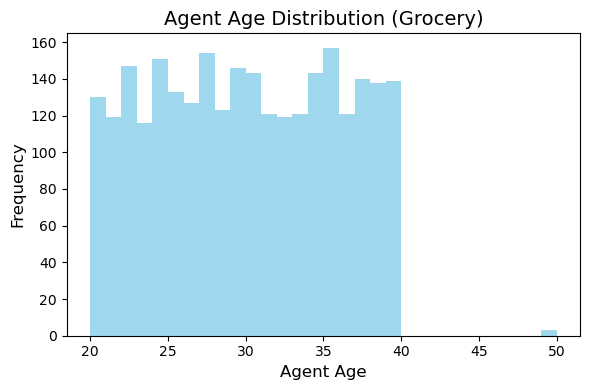

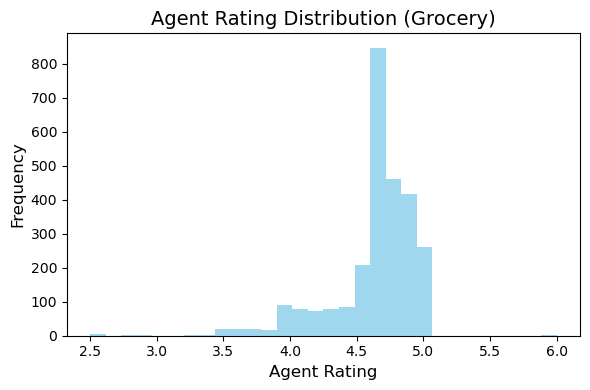

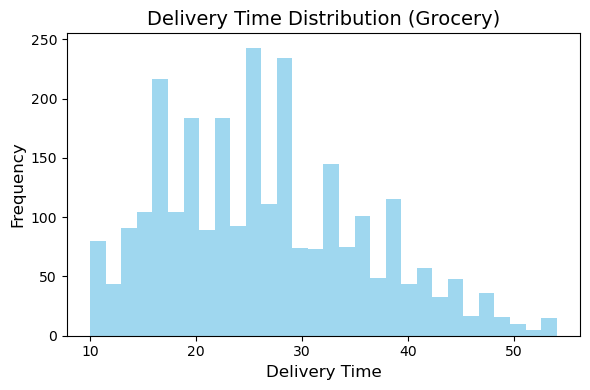

In [21]:
# visualize distributions in histograms
numeric_cols = ['agent_age', 'agent_rating', 'delivery_time']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df_grocery[col], bins=30, color='skyblue', alpha=0.8)
    plt.title(f'{col.replace("_", " ").title()} Distribution (Grocery)', fontsize=14)
    plt.xlabel(col.replace("_", " ").title(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

In [22]:
# Check the columns
df.columns

Index(['order_id', 'agent_age', 'agent_rating', 'store_latitude',
       'store_longitude', 'drop_latitude', 'drop_longitude', 'order_date',
       'order_time', 'pickup_time', 'weather', 'traffic', 'vehicle', 'area',
       'delivery_time', 'category'],
      dtype='object')

### Demand vs traffic

In [23]:
# check unique values in traffic
df['traffic'].unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', 'NaN '], dtype=object)

In [24]:
df_grocery['traffic'] = (
    df_grocery['traffic']
    .astype(str)                      # in case of NaN
    .str.strip()                      # remove leading/trailing spaces
    .str.title()                      # e.g. "high" → "High"
    .replace('Nan', pd.NA)            # restore missing values
)


In [25]:
df_grocery['traffic'].unique()


array(['High', 'Jam', 'Medium', 'Low', <NA>], dtype=object)

/var/folders/xs/pmxwbppj14b4v76l4llp17n80000gp/T/ipykernel_63934/3526393133.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


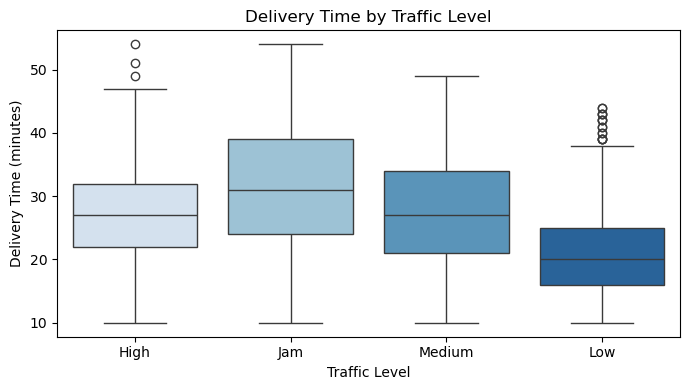

In [27]:
# Plot
plt.figure(figsize=(7, 4))
sns.boxplot(
    data=df_grocery,
    x='traffic',
    y='delivery_time',
    palette='Blues'
)
plt.title('Delivery Time by Traffic Level')
plt.xlabel('Traffic Level')
plt.ylabel('Delivery Time (minutes)')
plt.tight_layout()
plt.show()

In [28]:
df_grocery['pickup_hour'] = pd.to_datetime(
    df_grocery['pickup_time'],
    format='%H:%M:%S',
    errors='coerce'
).dt.hour


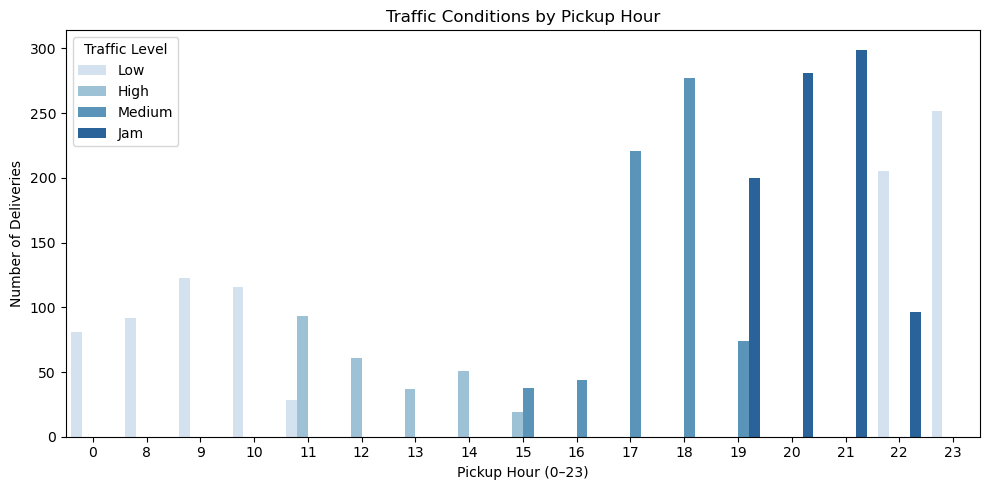

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_grocery, x='pickup_hour', hue='traffic', palette='Blues')
plt.title('Traffic Conditions by Pickup Hour')
plt.xlabel('Pickup Hour (0–23)')
plt.ylabel('Number of Deliveries')
plt.legend(title='Traffic Level')
plt.tight_layout()
plt.show()


In [30]:
print("""
Traffic and Demand Insights
• The highest traffic congestion (traffic jam) occurs between 7 PM and 10 PM.
• Elevated traffic is also observed between 11 AM and 1 PM, likely due to midday activity.
• The peak hours for grocery delivery demand are 5 PM to 9 PM, with 9 PM, 8 PM, and 6 PM showing the highest volume.
""")



Traffic and Demand Insights
• The highest traffic congestion (traffic jam) occurs between 7 PM and 10 PM.
• Elevated traffic is also observed between 11 AM and 1 PM, likely due to midday activity.
• The peak hours for grocery delivery demand are 5 PM to 9 PM, with 9 PM, 8 PM, and 6 PM showing the highest volume.



#### Checking weekdays


In [31]:
# Convert to datetime if needed
df_grocery['order_date'] = pd.to_datetime(df_grocery['order_date'], errors='coerce')

# Extract weekday name
df_grocery['weekday'] = df_grocery['order_date'].dt.day_name()


In [32]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


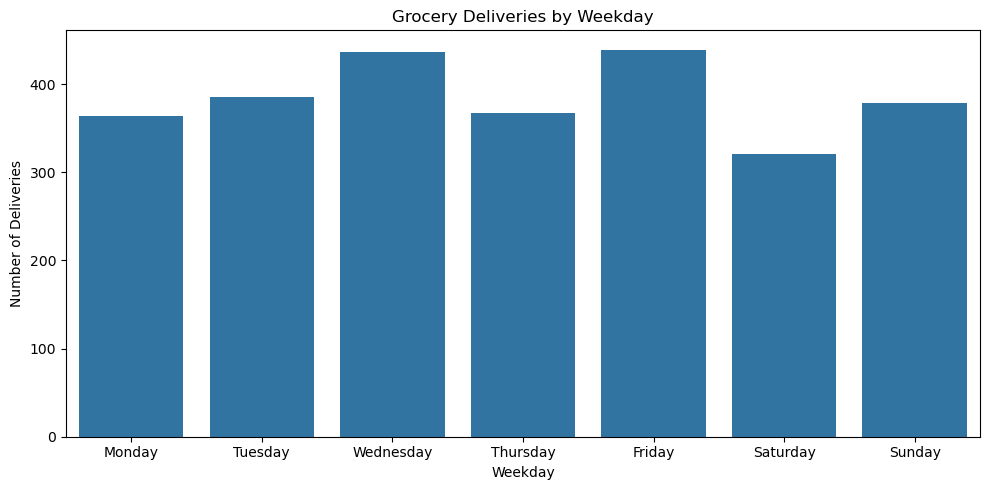

In [33]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_grocery, x='weekday', order=weekday_order)
plt.title('Grocery Deliveries by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Deliveries')
plt.tight_layout()
plt.show()

In [34]:
df_grocery['order_date'] = pd.to_datetime(df_grocery['order_date'], errors='coerce')
weeks = df_grocery['order_date'].dt.isocalendar().week.nunique()
print(f"Number of weeks in dataset: {weeks}")


Number of weeks in dataset: 8


In [35]:
# Extract week and weekday
df_grocery['week'] = df_grocery['order_date'].dt.isocalendar().week
df_grocery['weekday'] = df_grocery['order_date'].dt.day_name()

# Group by week and weekday
weekly_counts = df_grocery.groupby(['week', 'weekday']).size().reset_index(name='order_count')

# Now compute the average per weekday
weekday_avg = weekly_counts.groupby('weekday')['order_count'].mean().reindex(weekday_order)
print(weekday_avg.round(2))


weekday
Monday       60.67
Tuesday      64.17
Wednesday    62.29
Thursday     61.17
Friday       62.71
Saturday     53.50
Sunday       63.17
Name: order_count, dtype: float64


In [36]:
print("""
Weekday Delivery Demand (Average)

• Wednesday and Friday show the highest grocery delivery demand, averaging around 62 orders per week.
• Saturday has the lowest average volume, with approximately 53 orders.
• Overall, delivery demand is relatively balanced across the week, with no extreme fluctuations.
""")


Weekday Delivery Demand (Average)

• Wednesday and Friday show the highest grocery delivery demand, averaging around 62 orders per week.
• Saturday has the lowest average volume, with approximately 53 orders.
• Overall, delivery demand is relatively balanced across the week, with no extreme fluctuations.



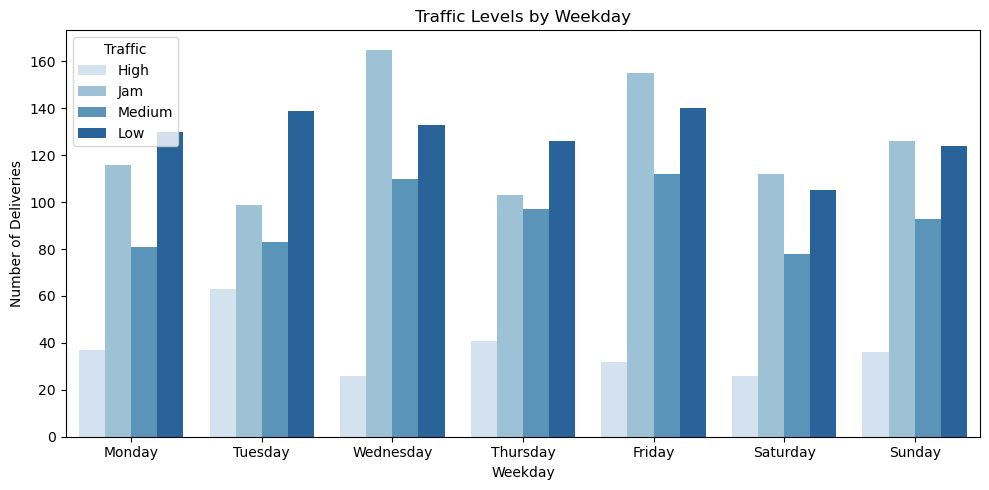

In [37]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_grocery, x='weekday', hue='traffic', order=weekday_order, palette='Blues')
plt.title('Traffic Levels by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Deliveries')
plt.legend(title='Traffic')
plt.tight_layout()
plt.show()


### Checking the coordinates: are they valid? Where are they?

Latitude and longitude values cluster around:
- Latitude ~17–22
- Longitude ~70–78

These coordinates are consistent with locations in Western to Central India, such as:
- Mumbai (Lat ~19, Lon ~72.8)
- Pune (Lat ~18.5, Lon ~73.8)
- Hyderabad (Lat ~17.4, Lon ~78.4)
- Ahmedabad (Lat ~23, Lon ~72.6)

So unless this is synthetic or anonymized data, it's very likely intended to simulate an Indian logistics operation.

### Flag Outliers using IRQ
What this does:
- It filters out rows where the value is below Q1 - 1.5×IQR or above Q3 + 1.5×IQR.
- You’ll get a cleaner dataset that’s better suited for plotting and statistical analysis.
- You can see how many rows were removed from each column.



In [38]:
# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [39]:
# cols_to_clean = ['agent_age', 'agent_rating', 'delivery_time']

# # Apply the function sequentially
# for col in cols_to_clean:
#     original_len = len(df_grocery)
#     df_grocery = remove_outliers_iqr(df_grocery, col)
#     new_len = len(df_grocery)
#     print(f"{col}: removed {original_len - new_len} outliers")


#### Outliers in Ratings

- Removed 3 invalid ratings above 5 (max scale confirmed to be 5 stars). 
These likely reflect input errors or data noise and were excluded from further analysis.
- Keep the few agents over 40 years old.
- I raised a red flag in some cases to analyze them further.

In [40]:
# df_grocery['weather'].unique()

In [41]:
df_grocery[df_grocery['agent_rating'] > 5]

,order_id,agent_age,agent_rating,store_latitude,store_longitude,drop_latitude,drop_longitude,order_date,order_time,pickup_time,weather,traffic,vehicle,area,delivery_time,category,pickup_hour,weekday,week
5142,dazy306268524,50,6.0,12.914264,77.678400,13.024264,77.788400,2022-04-06,NaN,20:55:00,unknown,<NA>,van,Metropolitian,18,Grocery,20,Wednesday,14
11807,csad638654181,50,6.0,21.186608,72.794136,21.206608,72.814136,2022-03-01,NaN,11:25:00,unknown,<NA>,scooter,Urban,22,Grocery,11,Tuesday,9
37001,wwew959985650,50,6.0,0.000000,0.000000,0.090000,0.090000,2022-04-06,NaN,19:20:00,unknown,<NA>,van,Metropolitian,36,Grocery,19,Wednesday,14


In [42]:
# Store the outliers separately (optional, for traceability)
rating_outliers = df_grocery[df_grocery['agent_rating'] > 5]

# Then remove them
df_grocery = df_grocery[df_grocery['agent_rating'] <= 5]


### Checking the frequency of ages and delivery time

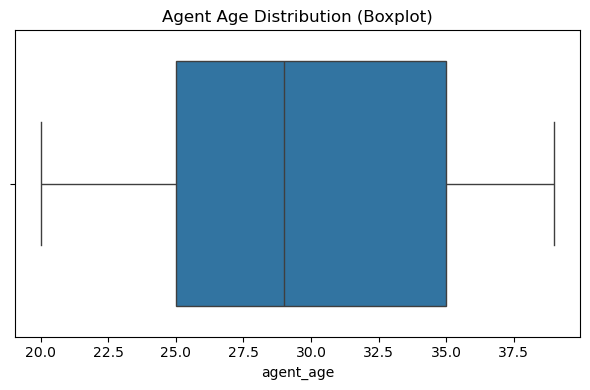

In [43]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_grocery, x='agent_age')
plt.title('Agent Age Distribution (Boxplot)')
plt.tight_layout()
plt.show()

In [44]:
# df_grocery['outlier_delivery_time'] = flag_outliers_iqr(df_grocery, 'delivery_time')


<Axes: xlabel='delivery_time'>

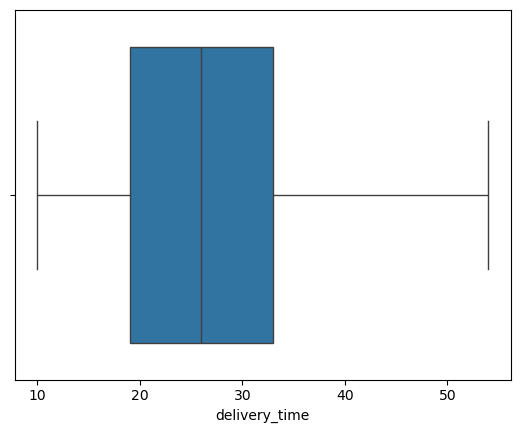

In [45]:
sns.boxplot(data=df_grocery, x='delivery_time')

In [46]:
print("""I flagged outliers using the IQR method but chose not to remove them yet. 
Some long deliveries may reflect real operational delays, differences in vehicles, weather, routes, time hours, distances, traffic, etc.  
I recommend tracking these cases separately for future process improvement.""")


I flagged outliers using the IQR method but chose not to remove them yet. 
Some long deliveries may reflect real operational delays, differences in vehicles, weather, routes, time hours, distances, traffic, etc.  
I recommend tracking these cases separately for future process improvement.


### Comparing distance with delivery time

In [47]:
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Create the new distance column
df_grocery['distance'] = haversine_distance(
    df_grocery['store_latitude'],
    df_grocery['store_longitude'],
    df_grocery['drop_latitude'],
    df_grocery['drop_longitude']
)

In [48]:
df_grocery[['distance', 'delivery_time']].describe()

,distance,delivery_time
count,2688.000000,2688.000000
mean,24.552726,26.540923
std,271.062556,9.499995
min,1.465203,10.000000
25%,4.663561,19.000000
50%,9.219878,26.000000
75%,13.612484,33.000000
max,6754.425359,54.000000


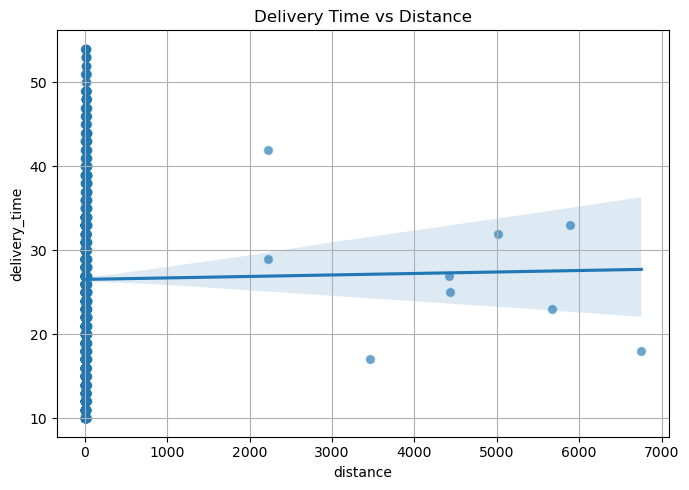

In [49]:
# visualize the relationship
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_grocery, x='distance', y='delivery_time', alpha=0.5)
plt.title('Delivery Time vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (min)')
plt.grid(True)
plt.tight_layout()
sns.regplot(data=df_grocery, x='distance', y='delivery_time', scatter_kws={'alpha':0.3})
plt.show()

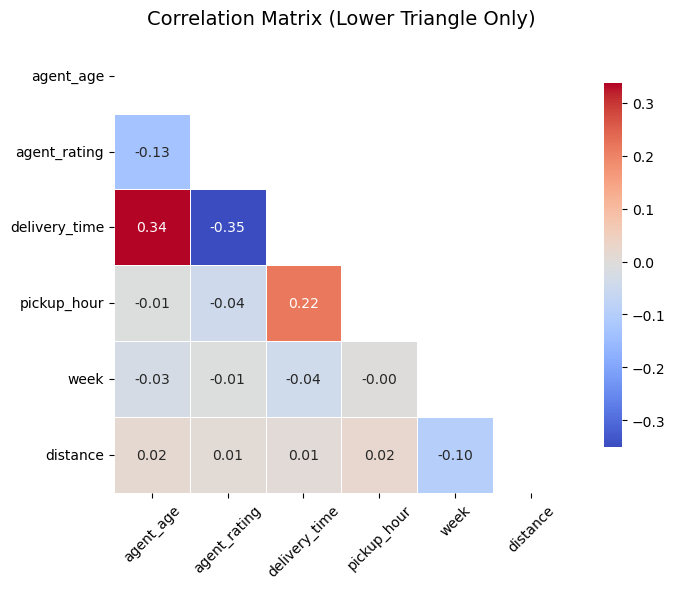

In [50]:
# Prepare numeric data (excluding lat/lon)
numeric_cols = df_grocery.select_dtypes(include='number').drop(
    columns=['store_latitude', 'store_longitude', 'drop_latitude', 'drop_longitude'],
    errors='ignore'
)

# Compute correlation matrix
corr = numeric_cols.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap with mask
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .8}
)
plt.title('Correlation Matrix (Lower Triangle Only)', fontsize=14, pad=10)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [51]:
print("""delivery_time vs distance: 
    Surprisingly weak: Could indicate issues in your distance calculation, or that other factors (traffic, weather, vehicle) 
    are more dominant than raw km. 
    This one deserves deeper investigation.
    """) 

print("""agent_rating vs agent_age:
    Older agents slightly tend to have lower ratings.
    """)

print("""delivery_type vs agent_age:
    Moderate positive: Older agents tend to take more time. 
    """)

print("""agent_rating vs delivery_time:
    Very weak negative: Slight signal that longer deliveries get slightly lower ratings. But is not significant
    """) 

print("""distance vs agent_age:
    No meaningful correlation: Agent age has no influence on delivery distance. Expected.
    """) 

print("""Takeaways:
    - agent_age seems to have more influence than expected → worth segmenting.
    - delivery_time vs distance → check the distance calculation or outliers.
    - agent_rating is surprisingly flat across other features → maybe ratings aren’t sensitive to performance (or are biased/noisy).
    """) 

delivery_time vs distance: 
    Surprisingly weak: Could indicate issues in your distance calculation, or that other factors (traffic, weather, vehicle) 
    are more dominant than raw km. 
    This one deserves deeper investigation.
    
agent_rating vs agent_age:
    Older agents slightly tend to have lower ratings.
    
delivery_type vs agent_age:
    Moderate positive: Older agents tend to take more time. 
    
agent_rating vs delivery_time:
    Very weak negative: Slight signal that longer deliveries get slightly lower ratings. But is not significant
    
distance vs agent_age:
    No meaningful correlation: Agent age has no influence on delivery distance. Expected.
    
Takeaways:
    - agent_age seems to have more influence than expected → worth segmenting.
    - delivery_time vs distance → check the distance calculation or outliers.
    - agent_rating is surprisingly flat across other features → maybe ratings aren’t sensitive to performance (or are biased/noisy).
    


### Why this is worth segmenting (even if correlation ≠ causation)

| Reason                     | Why it matters                                                                                 |
|----------------------------|-----------------------------------------------------------------------------------------------|
| **Behavioral insight**  | Older riders may deliver more carefully, slowly, or prefer certain shift times (e.g., off-peak). |
| **Operational planning**| You may want to analyze efficiency by age group, especially for staffing or shift optimization. |
| **Uncover hidden variables** | Age may be a proxy for experience, vehicle type, or part-time/full-time status.              |
| **Fairness or bias**     | If customers rate older agents differently or system assigns tasks unevenly, it’s worth monitoring. |


### Delivery time (min) vs agent age

In [52]:
# Create age group buckets
df_grocery['age_group'] = pd.cut(
    df_grocery['agent_age'], 
    bins=[18, 25, 35, 45, 55], 
    labels=['18-25', '26-35', '36-45', '46-55'])


In [53]:
# Compare avg delivery time per age group
df_grocery.groupby('age_group')['delivery_time'].describe()


/var/folders/xs/pmxwbppj14b4v76l4llp17n80000gp/T/ipykernel_63934/1121552684.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grocery.groupby('age_group')['delivery_time'].describe()


,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
18-25,796.0,23.021357,8.628798,10.0,16.0,22.0,28.0,54.0
26-35,1354.0,26.962334,9.523421,10.0,19.0,26.0,33.0,54.0
36-45,538.0,30.687732,8.763979,10.0,25.0,30.0,37.0,54.0
46-55,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


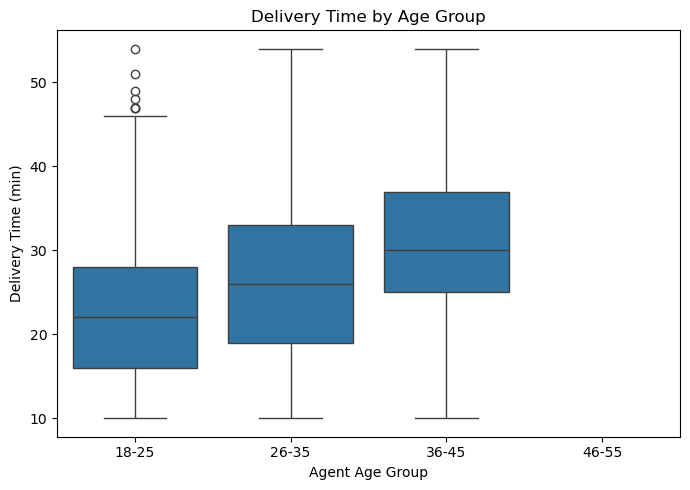

In [54]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_grocery, x='age_group', y='delivery_time')
plt.title('Delivery Time by Age Group')
plt.xlabel('Agent Age Group')
plt.ylabel('Delivery Time (min)')
plt.tight_layout()
plt.show()


In [55]:
# Compare average rating per age group
df_grocery.groupby('age_group')['agent_rating'].describe()


/var/folders/xs/pmxwbppj14b4v76l4llp17n80000gp/T/ipykernel_63934/367737627.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grocery.groupby('age_group')['agent_rating'].describe()


,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
18-25,796.0,4.680905,0.304783,2.5,4.6,4.7,4.9,5.0
26-35,1354.0,4.623954,0.325629,2.9,4.5,4.7,4.9,5.0
36-45,538.0,4.576394,0.337065,3.5,4.4,4.7,4.8,5.0
46-55,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Agent rating vs agent age

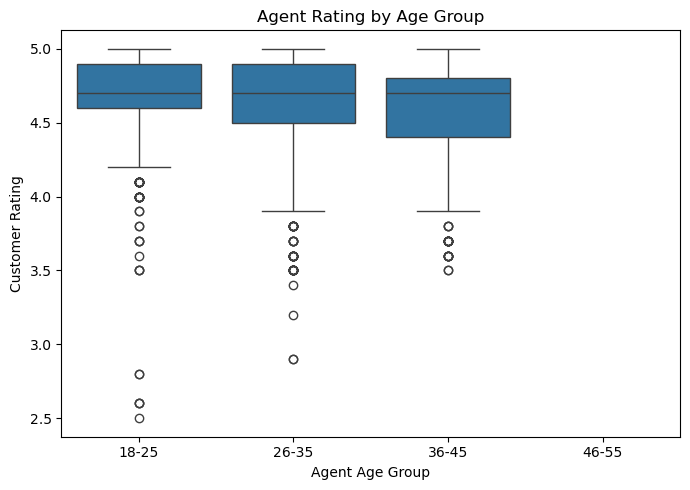

In [56]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_grocery, x='age_group', y='agent_rating')
plt.title('Agent Rating by Age Group')
plt.xlabel('Agent Age Group')
plt.ylabel('Customer Rating')
plt.tight_layout()
plt.show()


Compare agent_age across:
- route or distance (or define short vs long)
- weather
- traffic
- vehicle
- order_hour or time segment

In [58]:
# Combine order date + order time → full datetime
# df_grocery['order_datetime'] = pd.to_datetime(
#     df_grocery['order_date'] + ' ' + df_grocery['order_time'],
#     errors='coerce'
# )
df_grocery['order_datetime'] = pd.to_datetime(
    df_grocery['order_date'].astype(str) + ' ' + df_grocery['order_time'].astype(str),
    errors='coerce'
)


# Combine order date + pickup time (assuming pickup is same day)
# df_grocery['pickup_datetime'] = pd.to_datetime(
#     df_grocery['order_date'] + ' ' + df_grocery['pickup_time'],
#     errors='coerce'
# )
df_grocery['pickup_datetime'] = pd.to_datetime(
    df_grocery['order_date'].astype(str) + ' ' + df_grocery['pickup_time'].astype(str),
    errors='coerce'
)



In [59]:
df_grocery['pickup_hour'] = df_grocery['pickup_datetime'].dt.hour

df_grocery['time_of_day'] = pd.cut(
    df_grocery['pickup_hour'],
    bins=[-1, 6, 12, 18, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening']
)


In [61]:
df_grocery['order_to_pickup_min'] = (df_grocery['pickup_datetime'] - df_grocery['order_datetime']).dt.total_seconds() / 60


### Agent age vs time of the day (morning, afternoon, evening, night)

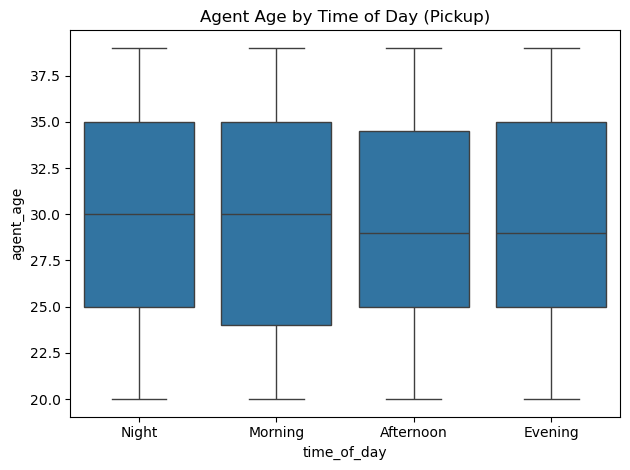

In [80]:
# agent age vs time of day
sns.boxplot(data=df_grocery, x='time_of_day', y='agent_age')
plt.title('Agent Age by Time of Day (Pickup)')
plt.tight_layout()
plt.show()


### Time of the day (morning, afternoon, evening, night) vs delivery time (min)

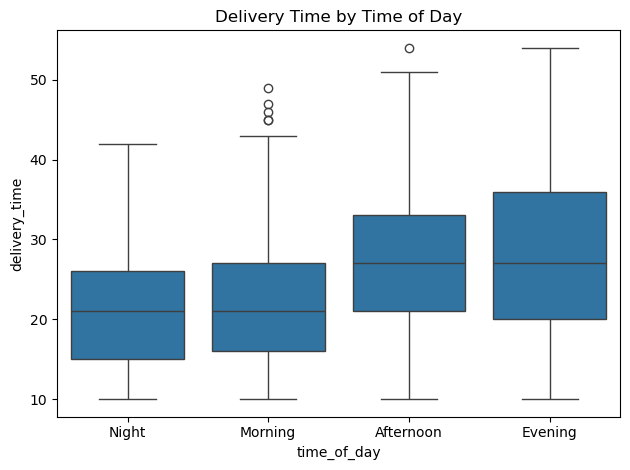

In [63]:
sns.boxplot(data=df_grocery, x='time_of_day', y='delivery_time')
plt.title('Delivery Time by Time of Day')
plt.tight_layout()
plt.show()


### Delivery Time vs Hour of Pickup

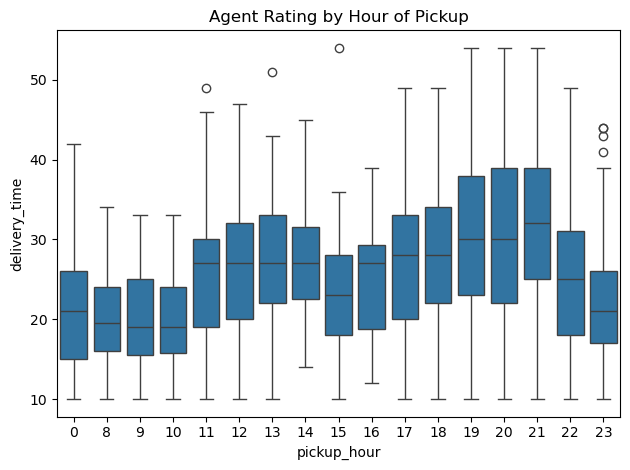

In [81]:
sns.boxplot(data=df_grocery, x='pickup_hour', y='delivery_time')
plt.title('Delivery Time by Hour of Pickup')
plt.tight_layout()
plt.show()

### Agent rating vs pickup hours

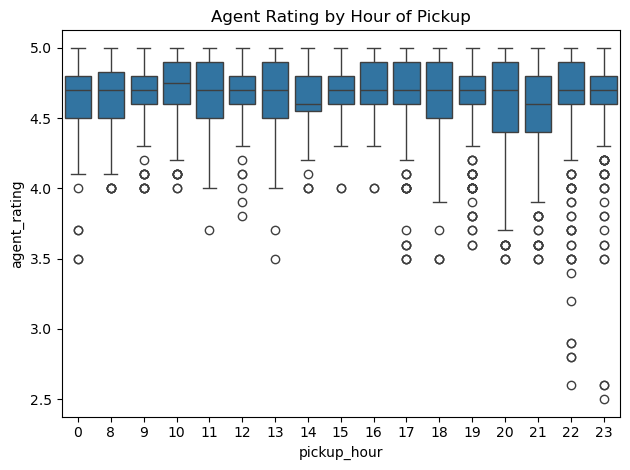

In [82]:
sns.boxplot(data=df_grocery, x='pickup_hour', y='agent_rating')
plt.title('Agent Rating by Hour of Pickup')
plt.tight_layout()
plt.show()

### Agent age vs number of deliver

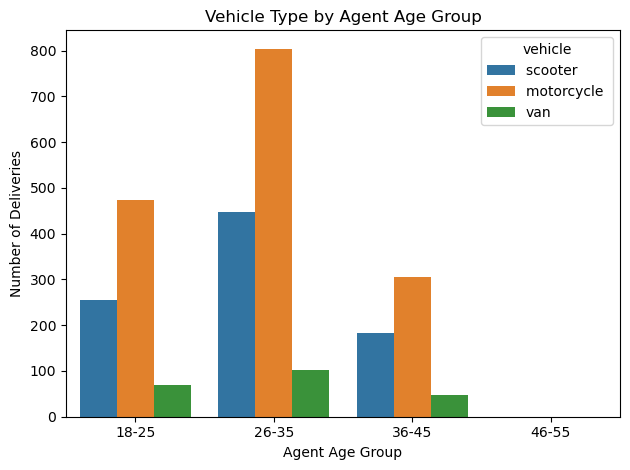

In [83]:
# If you have age_group already created:
sns.countplot(data=df_grocery, x='age_group', hue='vehicle')
plt.title('Vehicle Type by Agent Age Group')
plt.xlabel('Agent Age Group')
plt.ylabel('Number of Deliveries')
plt.tight_layout()
plt.show()


In [84]:
# df_grocery['agent_age'].value_counts().sort_index()


### Which features are most predictive or correlated with agent_rating?

In [85]:
df_grocery[['agent_rating', 'agent_age', 'delivery_time']].corr()


,agent_rating,agent_age,delivery_time
agent_rating,1.000000,-0.130972,-0.350990
agent_age,-0.130972,1.000000,0.337102
delivery_time,-0.350990,0.337102,1.000000


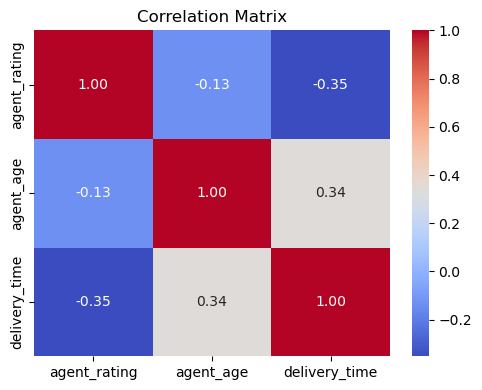

In [86]:
plt.figure(figsize=(5, 4))
sns.heatmap(
    df_grocery[['agent_rating', 'agent_age', 'delivery_time']].corr(),
    annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [87]:
print(""" It is clear that delivery speed influences rider ratings. 
Older agents tend to have slightly lower ratings and also take longer to complete deliveries. 
This suggests that the lower ratings may be a consequence of longer delivery times rather than age itself.

However, this analysis may be missing other important factors that impact customer satisfaction, 
such as keeping the customer informed during the delivery process, ensuring the groceries are delivered in good condition, 
and maintaining proper order and packaging. These qualitative aspects are not captured in the current
dataset but are likely to play a significant role in how customers rate their experience.""")

 It is clear that delivery speed influences rider ratings. 
Older agents tend to have slightly lower ratings and also take longer to complete deliveries. 
This suggests that the lower ratings may be a consequence of longer delivery times rather than age itself.

However, this analysis may be missing other important factors that impact customer satisfaction, 
such as keeping the customer informed during the delivery process, ensuring the groceries are delivered in good condition, 
and maintaining proper order and packaging. These qualitative aspects are not captured in the current
dataset but are likely to play a significant role in how customers rate their experience.


### 📝 Insights on Agent Rating Drivers
#### 📊 Key Findings
**🕒 Time of Delivery**

- Delivery times tend to be longer in the afternoon and evening, likely due to higher traffic volumes, increased order density, or rider fatigue as the day progresses.

- Surprisingly, the correlation between delivery time and distance is weak, suggesting that factors such as traffic conditions, wait times at stores, and rider behavior may play a more significant role in total delivery duration than distance alone.

**⭐ Delivery Speed and Customer Ratings**

- Delivery speed appears to influence customer ratings significantly.

- Older agents in the dataset tend to receive slightly lower ratings.

- These agents also show longer average delivery times, which may explain the lower ratings.

- This suggests that delivery duration, rather than age itself, may be the driving factor behind customer satisfaction scores.

**⚠️ Limitations and Missing Factors**
While this analysis covers numerical variables such as agent_age and delivery_time, it does not include qualitative factors that are likely to influence customer satisfaction. These include:

- Whether the agent kept the customer informed throughout the delivery

- The condition and organization of groceries upon arrival

- The agent’s professionalism and politeness during handoff

These aspects are not captured in the current dataset and would require additional data collection, such as:

- Open-text feedback from customers

- Post-delivery surveys

- In-app interaction logs or complaint records

In [88]:
# df_grocery.to_csv('data/grocery_cleaned_coordinates.csv', index=False)



In [89]:

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df_grocery['pickup_hour'] = pd.to_datetime(df_grocery['pickup_time'], errors='coerce').dt.hour



In [90]:
# Check period of the dataset
print(min(df['order_date']))
print(max(df['order_date']))

2022-02-11
2022-04-06
